#                                   Aufgabe 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#einlesen der datei
df = pd.read_excel(r"C:\Users\Admin\Documents\Aufgabe 1\Aufgabe 1 - IMDB Top 250.xlsx")
df

,Ranking,Erics Top Filme,Gesehen,Title,Date,RunTime,Genre,Rating,Director,Cast1,Cast2,Cast3,Cast4
0,1,1.0,1,The Shawshank Redemption,1994,142,Drama,93,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,2,0.0,1,The Godfather,1972,175,"Crime, Drama",92,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,3,0.0,1,The Godfather: Part II,1974,202,"Crime, Drama",90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
3,4,1.0,1,The Dark Knight,2008,152,"Action, Crime, Drama",90,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
4,5,1.0,1,12 Angry Men,1957,96,"Crime, Drama",90,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,NaN,0,The Battle of Algiers,1966,121,"Drama, War",81,Gillo Pontecorvo,Brahim Hadjadj,Jean Martin,Yacef Saadi,Samia Kerbash
246,247,NaN,0,Nights of Cabiria,1957,110,Drama,81,Federico Fellini,Giulietta Masina,François Périer,Franca Marzi,Dorian Gray
247,248,0.0,1,The Princess Bride,1987,98,"Adventure, Family, Fantasy",81,Rob Reiner,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon
248,249,NaN,0,Raatchasan,2018,170,"Crime, Drama, Mystery",84,Ram Kumar,Vishnu Vishal,Amala Paul,Radha Ravi,Sangili Murugan


In [3]:
#endgültige antwort auf frage 1,
genre_counts = df.groupby('Genre')['Title'].count()
genre_counts.sort_values(ascending=False).head(10)

Genre
Drama                           20
Crime, Drama                    14
Crime, Drama, Mystery            9
Biography, Drama, History        9
Animation, Adventure, Comedy     8
Drama, War                       8
Drama, Romance                   7
Action, Adventure, Drama         6
Crime, Drama, Thriller           6
Action, Crime, Drama             6
Name: Title, dtype: int64

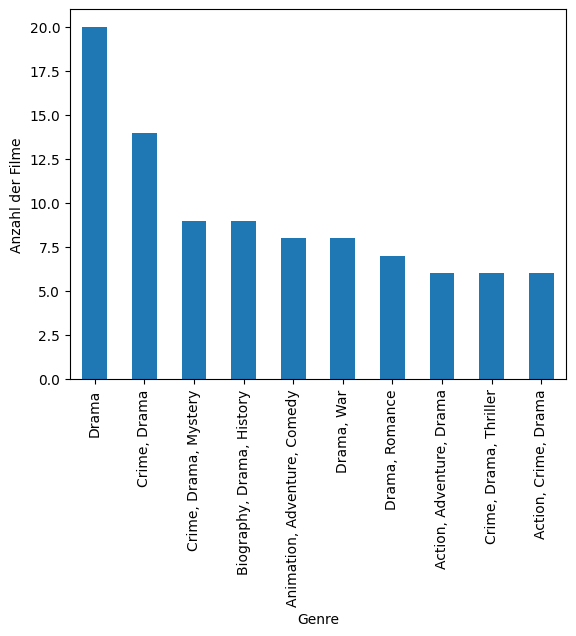

In [4]:
#vergrafisierung der genres
genre_counts = df.groupby('Genre')['Title'].count()
genre_counts.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Anzahl der Filme")
plt.show()

In [5]:
# Durchschnittliche Bewertung pro Genre, frage 2
film_genre = df.groupby('Genre')['Rating'].mean()
film_genre.sort_values(ascending=False, inplace=True)
film_genre.head(10)

Genre
Adventure, Western            88.000000
Adventure, Drama, Sci-Fi      86.000000
Crime, Drama, Fantasy         86.000000
Action, Drama                 86.000000
Crime, Drama, Horror          86.000000
Action, Sci-Fi                86.000000
Action, Adventure, Fantasy    85.750000
Action, Adventure, Drama      85.666667
Crime, Drama                  85.357143
Adventure, Comedy, Sci-Fi     85.000000
Name: Rating, dtype: float64

In [6]:
# Minimum, Maximum und Median Erscheinungsjahr,frage 3
min_year = df['Date'].min()
max_year = df['Date'].max()
median_year = df['Date'].median()

print("Min:", min_year)
print("Max:", max_year)
print("Middle:", median_year)

Min: 1921
Max: 2021
Middle: 1994.5


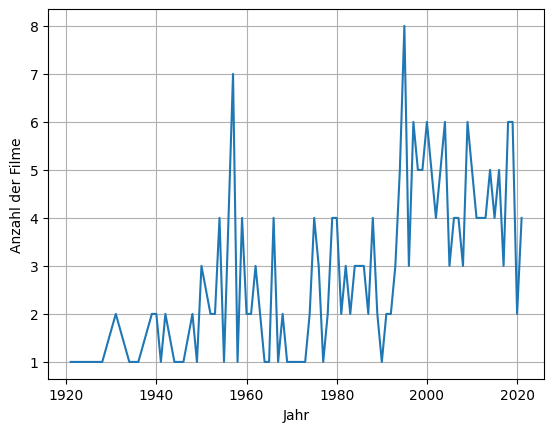

In [7]:
#besonderheiten der jahre
df["Date"].value_counts().sort_index().plot(kind='line',grid=True)
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Filme")
plt.show()

In [8]:
# Prozentualer Anteil der Filme, die von Eric gesehen wurden,frage 4
films_seen_by_eric = df['Gesehen'].sum() / len(df) * 100
films_liked_by_eric = df['Erics Top Filme'].sum() / len(df) * 100

print("Prozentualer Anteil der Filme, die von Eric gesehen wurden: {:.2f}%".format(films_seen_by_eric))
print("Prozentualer Anteil der Filme, die von Eric gut gefunden wurden: {:.2f}%".format(films_liked_by_eric))

Prozentualer Anteil der Filme, die von Eric gesehen wurden: 49.20%
Prozentualer Anteil der Filme, die von Eric gut gefunden wurden: 18.40%


In [9]:
# Durchschnittliche Bewertung für Filme unter 100 min(200min),frage 5
short_movies = df[df['RunTime'] < 100]
mean_rating_short = short_movies['Rating'].mean()
long_movies = df[df['RunTime'] > 200]
mean_rating_long = long_movies['Rating'].mean()

print("Durchschnittliche Bewertung für Filme unter 100 min: {:.2f}".format(mean_rating_short))
print("Durchschnittliche Bewertung für Filme über 200 min: {:.2f}".format(mean_rating_long))

Durchschnittliche Bewertung für Filme unter 100 min: 82.31
Durchschnittliche Bewertung für Filme über 200 min: 84.00


In [10]:
mean_length = df['RunTime'].mean()
length_counts = df['RunTime'].value_counts()

print("Durchschnittliche Filmlänge: ", mean_length)
print("Anzahl der Filme pro Längen-Kategorie: \n", length_counts)

Durchschnittliche Filmlänge:  130.288
Anzahl der Filme pro Längen-Kategorie: 
 130    9
132    6
129    6
98     6
99     6
      ..
195    1
156    1
180    1
158    1
205    1
Name: RunTime, Length: 102, dtype: int64


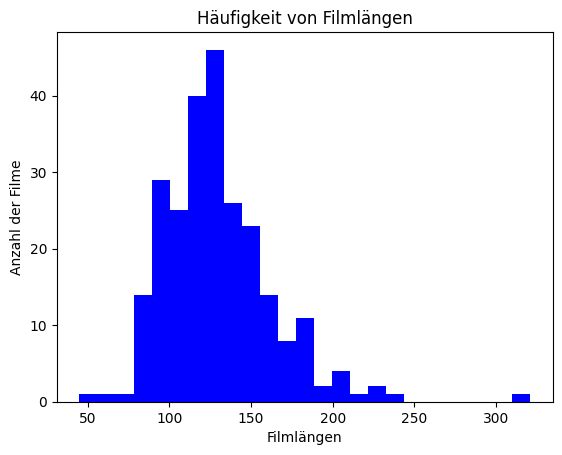

In [11]:
plt.hist(df['RunTime'], bins=25,color=["b"])
# Labels hinzufügen
plt.xlabel('Filmlängen')
plt.ylabel('Anzahl der Filme')
# Titel hinzufügen
plt.title('Häufigkeit von Filmlängen')
# Anzeigen
plt.show()

In [12]:
top_250 = df[df['Ranking'] <= 10]
eric = df[df['Erics Top Filme'] == 'Yes']
top_250_genres = top_250.groupby('Genre')['Title'].count()
eric_genres = eric.groupby('Genre')['Title'].count()
print(top_250_genres)
print(eric_genres)

Genre
Action, Adventure, Drama     2
Action, Crime, Drama         1
Adventure, Western           1
Biography, Drama, History    1
Crime, Drama                 4
Drama                        1
Name: Title, dtype: int64
Series([], Name: Title, dtype: int64)


In [13]:
# Zählen der Filme pro Schauspieler, frage 6
movies_per_actor1 = df['Cast1'].value_counts()
movies_per_actor1

 Robert De Niro         6
 Tom Hanks              5
 Leonardo DiCaprio      5
 Charles Chaplin        5
 James Stewart          4
                       ..
 Takashi Shimura        1
 Lamberto Maggiorani    1
 Peter O'Toole          1
 Matthew Modine         1
 Vicky Kaushal          1
Name: Cast1, Length: 184, dtype: int64

In [14]:
movies_per_actor2 = df['Cast2'].value_counts()
movies_per_actor2

  Robert De Niro        3
  Matt Damon            3
  Harrison Ford         3
  Gael García Bernal    2
  Chris Hemsworth       2
                       ..
  Ellen Widmann         1
  Thomas Bo Larsen      1
  Jared Leto            1
  Donald O'Connor       1
  Banita Sandhu         1
Name: Cast2, Length: 229, dtype: int64

In [15]:
movies_per_actor3 = df['Cast3'].value_counts()
movies_per_actor3

  Joe Pesci             3
  Carrie Fisher         3
  Mark Ruffalo          3
  George Sanders        2
  Tatsuya Nakadai       2
                       ..
  Tisca Chopra          1
  Barbara Bel Geddes    1
  Inge Landgut          1
  Dorothy Comingore     1
  Shaun Scott           1
Name: Cast3, Length: 239, dtype: int64

In [16]:
movies_per_actor4 = df['Cast4'].value_counts()
movies_per_actor4

  Steve Buscemi      2
  Michael Caine      2
  Olivia Williams    2
  Diane Keaton       2
  Orlando Bloom      2
                    ..
  Vipin Sharma       1
  Tom Helmore        1
  Otto Wernicke      1
  Agnes Moorehead    1
  Stephen Hogan      1
Name: Cast4, Length: 240, dtype: int64

In [17]:
# Konvertiere die Spalten zur liste
actors = df[["Cast1", "Cast2", "Cast3", "Cast4"]].values.flatten()
actors = [actor for actor in actors if pd.notnull(actor)]
# Berechne die Häufigkeiten der Schauspieler
actor_counts = Counter(actors)
# Drucke die besten 10 Schauspieler aus
for actor, count in actor_counts.most_common(10):
    print(actor, count)

 Robert De Niro 6
 Tom Hanks 5
 Leonardo DiCaprio 5
 Charles Chaplin 5
 Christian Bale 4
 Clint Eastwood 4
 Toshirô Mifune 4
 James Stewart 4
  Morgan Freeman 3
 Al Pacino 3


In [18]:
df["Cast"] = df["Cast1"] + "," + df["Cast2"] + "," + df["Cast3"] + "," + df["Cast4"]
df = df.drop(["Cast1","Cast2","Cast3","Cast4"], axis=1)
df

,Ranking,Erics Top Filme,Gesehen,Title,Date,RunTime,Genre,Rating,Director,Cast
0,1,1.0,1,The Shawshank Redemption,1994,142,Drama,93,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, W..."
1,2,0.0,1,The Godfather,1972,175,"Crime, Drama",92,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Dian..."
2,3,0.0,1,The Godfather: Part II,1974,202,"Crime, Drama",90,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, ..."
3,4,1.0,1,The Dark Knight,2008,152,"Action, Crime, Drama",90,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart..."
4,5,1.0,1,12 Angry Men,1957,96,"Crime, Drama",90,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, J..."
...,...,...,...,...,...,...,...,...,...,...
245,246,NaN,0,The Battle of Algiers,1966,121,"Drama, War",81,Gillo Pontecorvo,"Brahim Hadjadj, Jean Martin, Yacef Saadi, ..."
246,247,NaN,0,Nights of Cabiria,1957,110,Drama,81,Federico Fellini,"Giulietta Masina, François Périer, Franca M..."
247,248,0.0,1,The Princess Bride,1987,98,"Adventure, Family, Fantasy",81,Rob Reiner,"Cary Elwes, Mandy Patinkin, Robin Wright, ..."
248,249,NaN,0,Raatchasan,2018,170,"Crime, Drama, Mystery",84,Ram Kumar,"Vishnu Vishal, Amala Paul, Radha Ravi, San..."


In [19]:
df.filter(items=["Title","Cast"])

,Title,Cast
0,The Shawshank Redemption,"Tim Robbins, Morgan Freeman, Bob Gunton, W..."
1,The Godfather,"Marlon Brando, Al Pacino, James Caan, Dian..."
2,The Godfather: Part II,"Al Pacino, Robert De Niro, Robert Duvall, ..."
3,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart..."
4,12 Angry Men,"Henry Fonda, Lee J. Cobb, Martin Balsam, J..."
...,...,...
245,The Battle of Algiers,"Brahim Hadjadj, Jean Martin, Yacef Saadi, ..."
246,Nights of Cabiria,"Giulietta Masina, François Périer, Franca M..."
247,The Princess Bride,"Cary Elwes, Mandy Patinkin, Robin Wright, ..."
248,Raatchasan,"Vishnu Vishal, Amala Paul, Radha Ravi, San..."


In [20]:
actor_counts = pd.Series(actors).value_counts()
actor_counts.head()

 Robert De Niro       6
 Charles Chaplin      5
 Tom Hanks            5
 Leonardo DiCaprio    5
 Christian Bale       4
dtype: int64

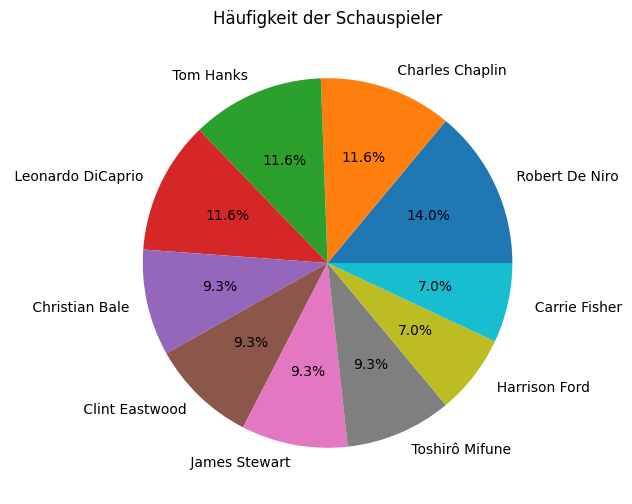

In [21]:
actor_counts = pd.Series(actors).value_counts()

actor_counts.head(10).plot.pie(autopct='%.1f%%', figsize=(6, 6))
plt.title("Häufigkeit der Schauspieler")
plt.show()

In [22]:
# Filme die eric noch nicht gesehen hat, Hauptfrage
not_seen_by_eric = df[df['Gesehen'] == 0]
sorted_not_seen_by_eric = not_seen_by_eric.sort_values(by='Rating', ascending=False)
best_unseen_movie = sorted_not_seen_by_eric.iloc[0]
"Der Film für Eric ist: {} der mit der Bewertung von {:.2f} und dem Jahr {} veröffentlicht wurde".format(best_unseen_movie['Title'], best_unseen_movie['Rating'],best_unseen_movie['Date'])

'Der Film für Eric ist: Jai Bhim der mit der Bewertung von 93.00 und dem Jahr 2021 veröffentlicht wurde'